In [62]:
%matplotlib inline
import pandas as pd
import json
import os
from statsbombpy import sb
from mplsoccer import Pitch, Sbopen
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [63]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [64]:
euros_2024_competition_id = 55
euros_2024_season_id = 282
matches = sb.matches(competition_id=euros_2024_competition_id, season_id=euros_2024_season_id)

In [65]:
spain_matches = matches[(matches['home_team'] == 'Spain') | (matches['away_team'] == 'Spain')]
for _, match in spain_matches.iterrows():
    match_id = match['match_id']
    
    print(f"Match ID: {match_id}")

Match ID: 3943043
Match ID: 3942752
Match ID: 3942226
Match ID: 3941018
Match ID: 3930179
Match ID: 3930172
Match ID: 3930160


In [66]:
lineups = sb.lineups(match_id=3942226)
lineups

{'Spain':     player_id                      player_name   player_nickname  \
 0        3042               Mikel Merino Zazón      Mikel Merino   
 1        3076            Ayoze Pérez Gutiérrez       Ayoze Pérez   
 2        3265         José Luis Sanmartín Mato            Joselu   
 3        3477       Álvaro Borja Morata Martín     Álvaro Morata   
 4        4127                David Raya Martin        David Raya   
 5        4353                  Aymeric Laporte              None   
 6        5202  José Ignacio Fernández Iglesias             Nacho   
 7        5721            Daniel Carvajal Ramos   Daniel Carvajal   
 8        6655                 Fabián Ruiz Peña       Fabián Ruiz   
 9        6685           Mikel Oyarzabal Ugarte   Mikel Oyarzabal   
 10       6748             Ferrán Torres García     Ferrán Torres   
 11       6765       Rodrigo Hernández Cascante             Rodri   
 12       6821             Jesús Navas González       Jesús Navas   
 13      10336        Ale

In [67]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(3942752)
team1, team2 = df.team_name.unique()
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

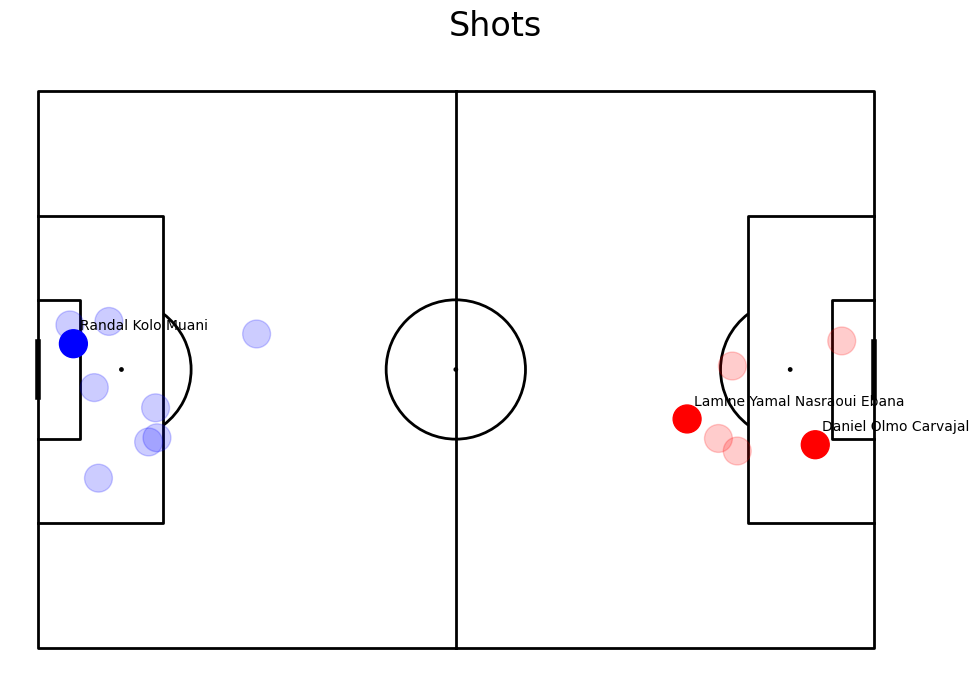

In [68]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
pitchLengthX = 120
pitchWidthY = 80
for i,shot in shots.iterrows():
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']    
    circleSize=2
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['player_name']) 
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue") 
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player_name'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
fig.suptitle("Shots", fontsize = 24)     
fig.set_size_inches(10, 7)
plt.show()

In [69]:
olmo_shots_passes = []
for _, match in spain_matches.iterrows():
    match_id = match['match_id']
    home_team = match['home_team']
    away_team = match['away_team']
    parser = Sbopen()
    df, related, freeze, tactics = parser.event(match_id)
    
    df_olmo = df[(df['player_name'] == 'Daniel Olmo Carvajal') & (df['type_name'].isin(['Shot', 'Pass']))]
    if not df_olmo.empty:
        olmo_shots_passes.append((df_olmo, match_id, home_team, away_team))

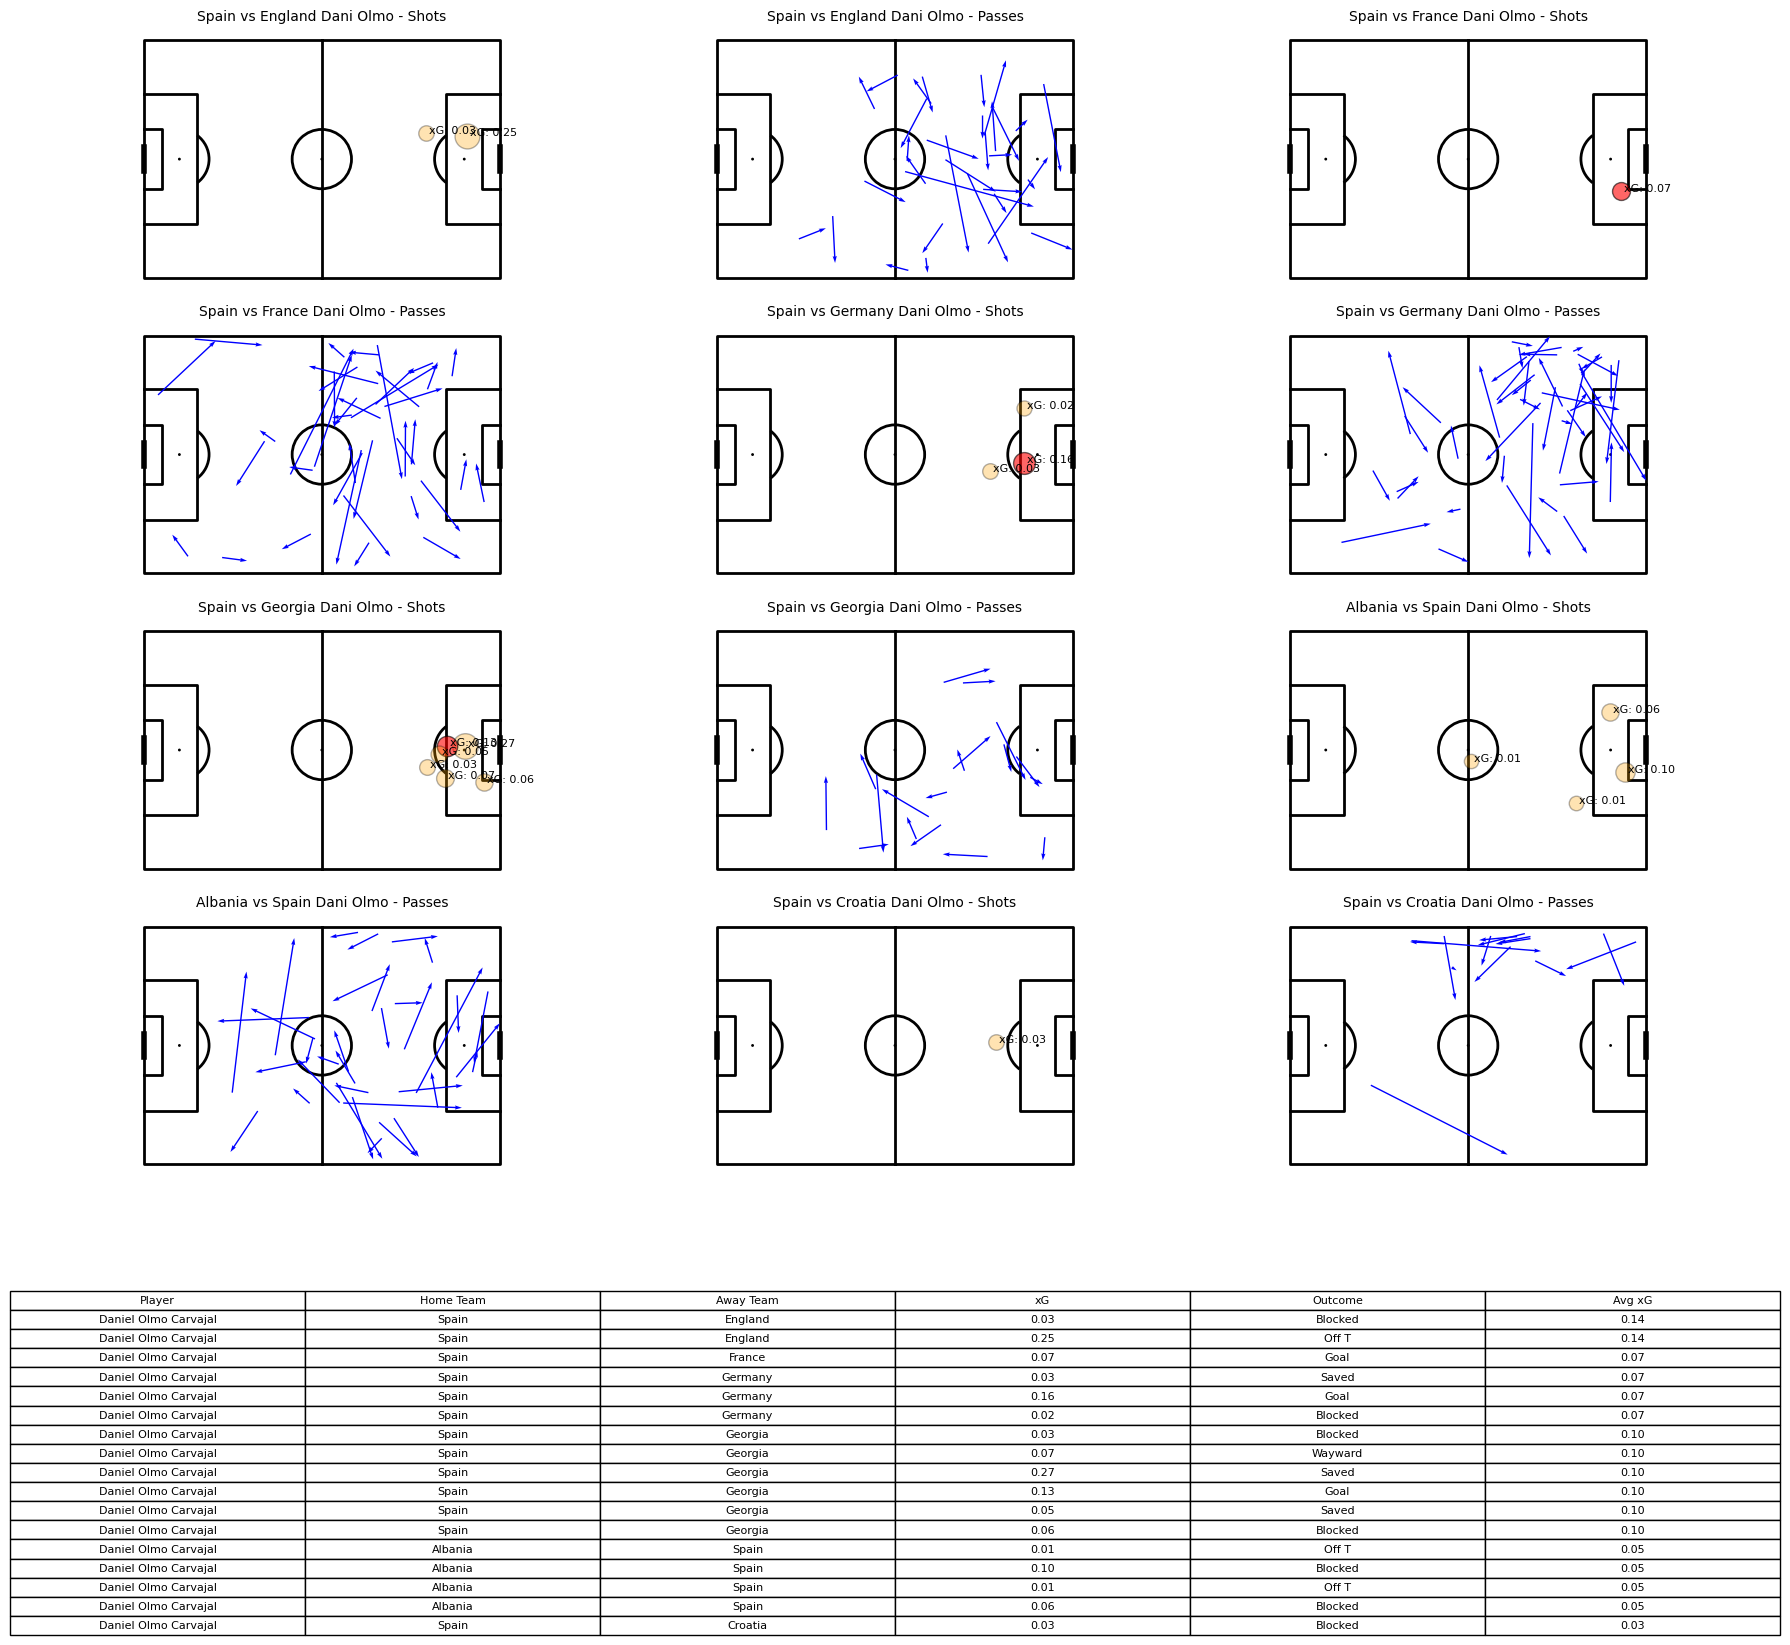

In [70]:
num_matches = len(olmo_shots_passes)
cols = min(3, num_matches)
rows = (num_matches + cols - 1) // cols

fig = plt.figure(figsize=(cols * 6, rows * 8), facecolor='white')
gs = gridspec.GridSpec(rows * 2, cols)

pitch = Pitch(line_color='black', pitch_color='white')

for i, (df_olmo, match_id, home_team, away_team) in enumerate(olmo_shots_passes):
    ax_shots = fig.add_subplot(gs[i * 2], facecolor='white')
    ax_passes = fig.add_subplot(gs[i * 2 + 1], facecolor='white')

    pitch.draw(ax=ax_shots)
    pitch.draw(ax=ax_passes)

    shots = df_olmo[df_olmo['type_name'] == 'Shot']
    passes = df_olmo[df_olmo['type_name'] == 'Pass']

    for _, shot in shots.iterrows():
        x, y = shot['x'], shot['y']
        xg = shot['shot_statsbomb_xg'] 
        goal = shot['outcome_name'] == 'Goal'
        circle_size = (xg * 900) + 100
        
        color = 'red' if goal else 'orange'
        alpha = 0.6 if goal else 0.3

        ax_shots.scatter(x, y, s=circle_size, color=color, alpha=alpha, edgecolor='black', zorder=2)
        ax_shots.text(x + 1, y, f"xG: {xg:.2f}", fontsize=8, color='black', zorder=3)

    for _, p in passes.iterrows():
        pitch.arrows(p['x'], p['y'], p['end_x'], p['end_y'], color='blue', ax=ax_passes, width=1, zorder=1)

    ax_shots.set_title(f"{home_team} vs {away_team} Dani Olmo - Shots", fontsize=10)
    ax_passes.set_title(f"{home_team} vs {away_team} Dani Olmo - Passes", fontsize=10)

for i in range(len(olmo_shots_passes) * 2, rows * cols * 2):
    fig.delaxes(fig.axes[i])

table_data = []
for df_olmo, match_id, home_team, away_team in olmo_shots_passes:
    shots = df_olmo[df_olmo['type_name'] == 'Shot']
    avg_xg = shots['shot_statsbomb_xg'].mean()  
    
    for _, shot in shots.iterrows():
        table_data.append([shot['player_name'], home_team, away_team, f"{shot['shot_statsbomb_xg']:.2f}", shot['outcome_name'], f"{avg_xg:.2f}"])

table_df = pd.DataFrame(table_data, columns=['Player', 'Home Team', 'Away Team', 'xG', 'Outcome', 'Avg xG'])

fig.subplots_adjust(bottom=0.25)
ax_table = fig.add_subplot(111, frame_on=False)
ax_table.xaxis.set_visible(False)
ax_table.yaxis.set_visible(False)

table = ax_table.table(cellText=table_df.values, colLabels=table_df.columns, cellLoc='center', loc='bottom', bbox=[0, -0.4, 1, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.5)

plt.tight_layout()
plt.show()

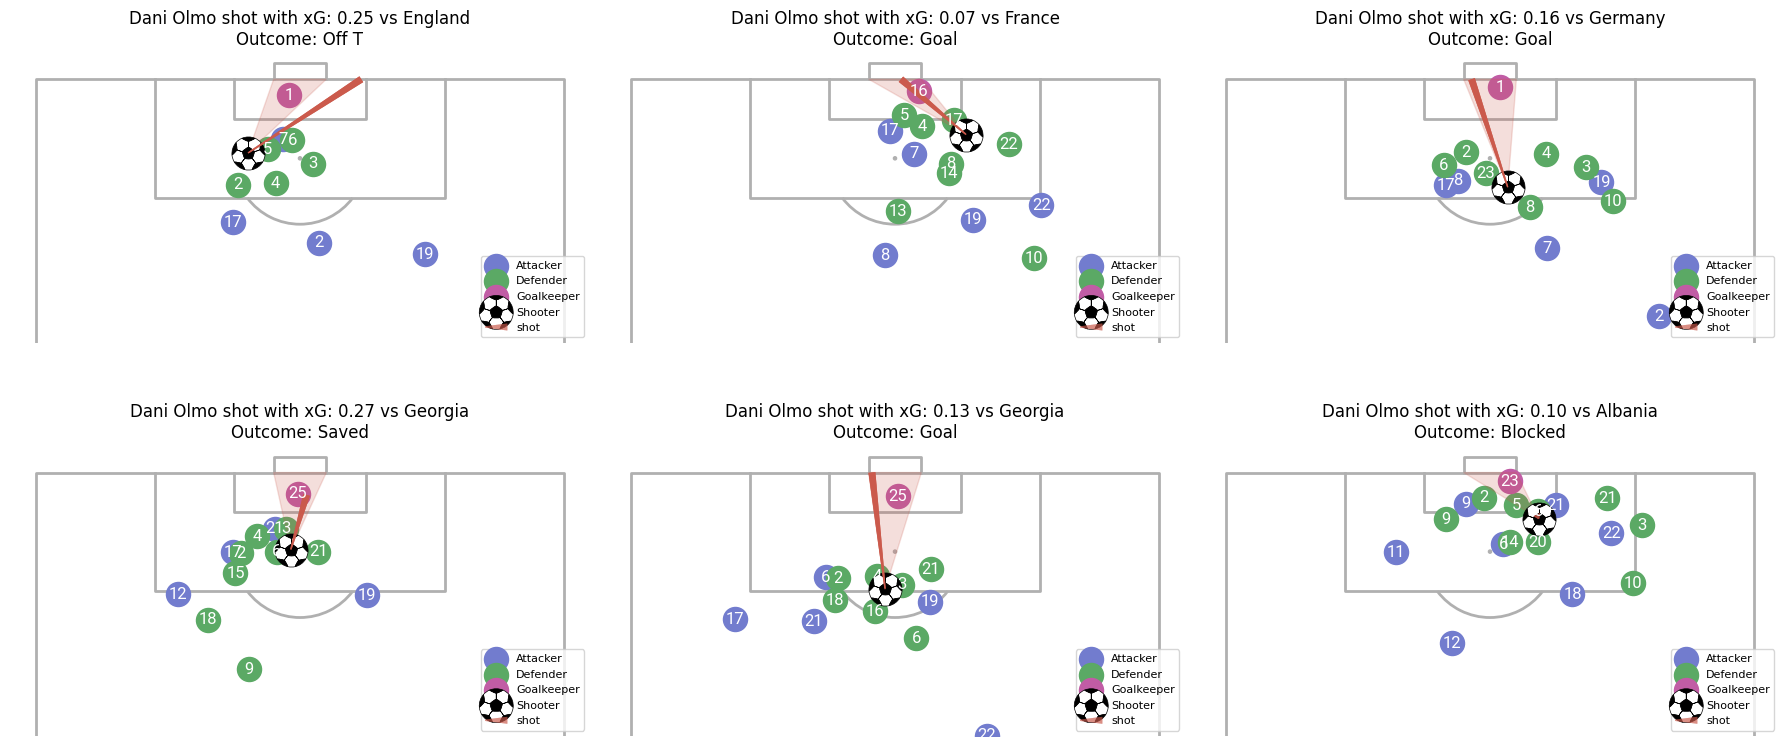

In [71]:
from mplsoccer import VerticalPitch, FontManager
parser = Sbopen()
olmo_filtered_shots = []

for _, match in spain_matches.iterrows():
    match_id = match['match_id']
    home_team = match['home_team']
    away_team = match['away_team']
    
    df, related, freeze, tactics = parser.event(match_id)
    df_olmo = df[(df['player_name'] == 'Daniel Olmo Carvajal') & (df['type_name'] == 'Shot')]
    
    filtered_shots = df_olmo[(df_olmo['shot_statsbomb_xg'] > 0.08) | (df_olmo['outcome_name'] == 'Goal')]
    
    if not filtered_shots.empty:
        for _, shot in filtered_shots.iterrows():
            shot_id = shot['id']
            df_freeze_frame = freeze[freeze['id'] == shot_id].copy()
            olmo_filtered_shots.append((shot, match_id, home_team, away_team, df_freeze_frame))

num_matches = len(olmo_filtered_shots)
cols = min(3, num_matches)
rows = (num_matches + cols - 1) // cols

fig = plt.figure(figsize=(cols * 6, rows * 8), facecolor='white')
gs = gridspec.GridSpec(rows * 2, cols)

robotto_regular = FontManager()

for i, (shot, match_id, home_team, away_team, df_freeze_frame) in enumerate(olmo_filtered_shots):
    pitch = VerticalPitch(half=True, goal_type='box', pad_bottom=-20)
    ax = fig.add_subplot(gs[i])
    
    df_lineup = parser.lineup(match_id)
    df_lineup = df_lineup[['player_id', 'jersey_number', 'team_name']].copy()
    df_freeze_frame = df_freeze_frame.merge(df_lineup, how='left', on='player_id')
    
    team1 = shot['team_name']
    team2 = list(set(df_lineup['team_name'].unique()) - {team1})[0]
    
    df_team1 = df_freeze_frame[df_freeze_frame['team_name'] == team1]
    df_team2_goal = df_freeze_frame[(df_freeze_frame['team_name'] == team2) &
                                    (df_freeze_frame['position_name'] == 'Goalkeeper')]
    df_team2_other = df_freeze_frame[(df_freeze_frame['team_name'] == team2) &
                                     (df_freeze_frame['position_name'] != 'Goalkeeper')]

    pitch.draw(ax=ax)
    
    pitch.scatter(df_team1.x, df_team1.y, s=300, c='#727cce', label='Attacker', ax=ax)
    pitch.scatter(df_team2_other.x, df_team2_other.y, s=300, c='#5ba965', label='Defender', ax=ax)
    pitch.scatter(df_team2_goal.x, df_team2_goal.y, s=300, ax=ax, c='#c15ca5', label='Goalkeeper')
    
    pitch.scatter(shot['x'], shot['y'], marker='football', s=600, ax=ax, label='Shooter', zorder=1.2)
    pitch.lines(shot['x'], shot['y'], shot['end_x'], shot['end_y'], comet=True, label='shot', color='#cb5a4c', ax=ax)
    pitch.goal_angle(shot['x'], shot['y'], ax=ax, alpha=0.2, zorder=1.1, color='#cb5a4c', goal='right')
    
    for j, row in df_freeze_frame.iterrows():
        pitch.annotate(row['jersey_number'], (row['x'], row['y']), color='white',
                       va='center', ha='center', fontsize=12, fontproperties=robotto_regular.prop, ax=ax)

    xG_value = shot['shot_statsbomb_xg']
    outcome = shot['outcome_name']
    
    ax.set_title(f"Dani Olmo shot with xG: {xG_value:.2f} vs {team2}\nOutcome: {outcome}", fontsize=12)
    ax.legend(loc='lower right', fontsize=8)

fig.tight_layout()
plt.show()

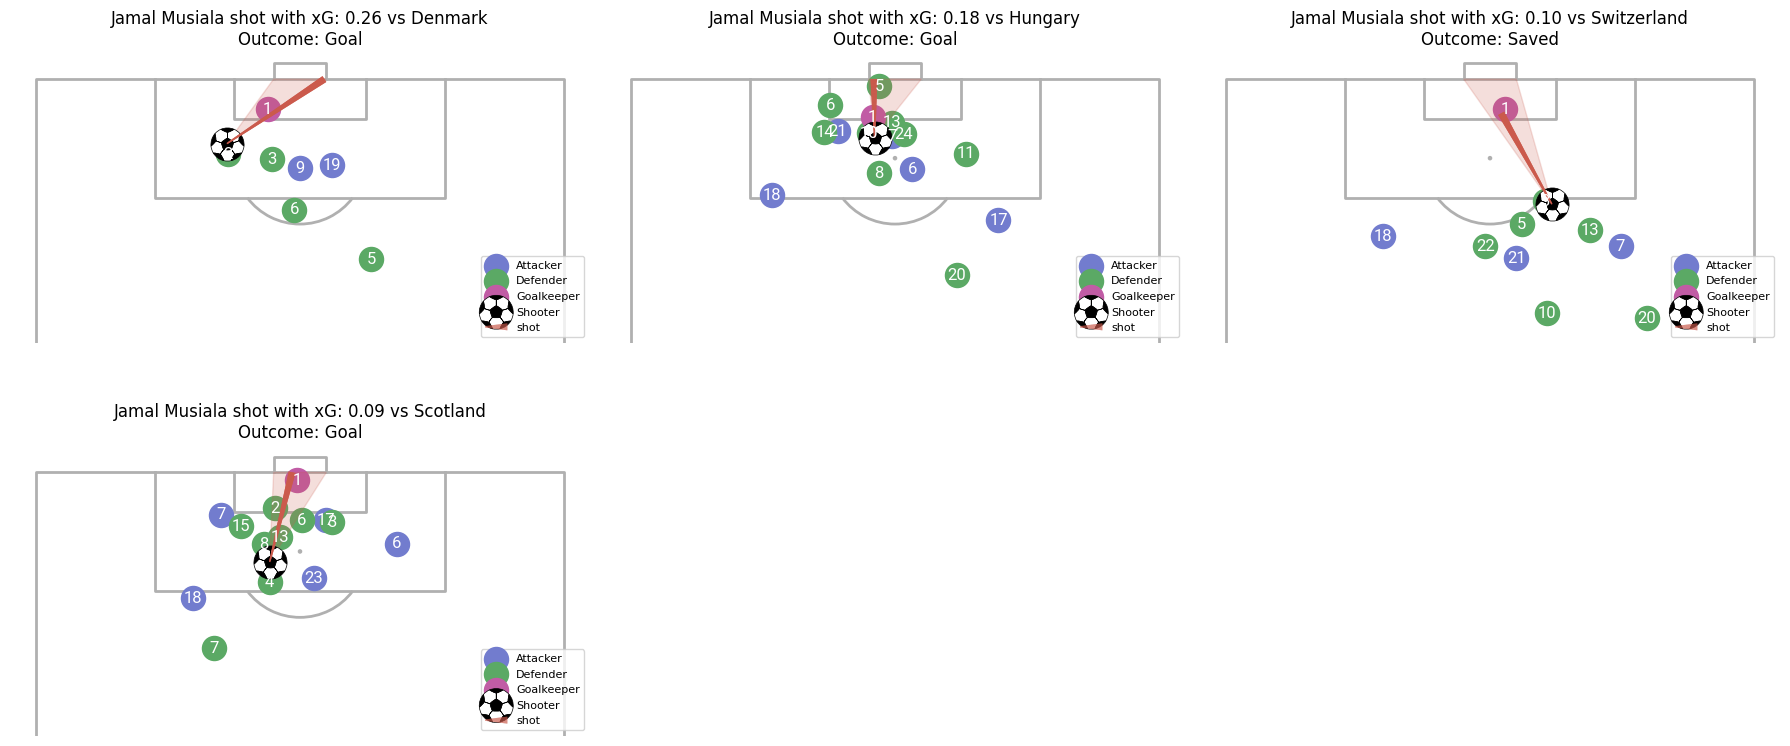

In [72]:
germany_matches = matches[(matches['home_team'] == 'Germany') | (matches['away_team'] == 'Germany')]

parser = Sbopen()
musiala_filtered_shots = []

for _, match in germany_matches.iterrows():
    match_id = match['match_id']
    home_team = match['home_team']
    away_team = match['away_team']
    
    df, related, freeze, tactics = parser.event(match_id)
    df_musiala = df[(df['player_name'] == 'Jamal Musiala') & (df['type_name'] == 'Shot')]
    
    filtered_shots = df_musiala[(df_musiala['shot_statsbomb_xg'] > 0.08) | (df_musiala['outcome_name'] == 'Goal')]
    
    if not filtered_shots.empty:
        for _, shot in filtered_shots.iterrows():
            shot_id = shot['id']
            df_freeze_frame = freeze[freeze['id'] == shot_id].copy()
            musiala_filtered_shots.append((shot, match_id, home_team, away_team, df_freeze_frame))

num_matches = len(musiala_filtered_shots)
cols = min(3, num_matches)
rows = (num_matches + cols - 1) // cols

fig = plt.figure(figsize=(cols * 6, rows * 8), facecolor='white')
gs = gridspec.GridSpec(rows * 2, cols)

robotto_regular = FontManager()

for i, (shot, match_id, home_team, away_team, df_freeze_frame) in enumerate(musiala_filtered_shots):
    pitch = VerticalPitch(half=True, goal_type='box', pad_bottom=-20)
    ax = fig.add_subplot(gs[i])
    
    df_lineup = parser.lineup(match_id)
    df_lineup = df_lineup[['player_id', 'jersey_number', 'team_name']].copy()
    df_freeze_frame = df_freeze_frame.merge(df_lineup, how='left', on='player_id')
    
    team1 = shot['team_name']
    team2 = list(set(df_lineup['team_name'].unique()) - {team1})[0]
    
    df_team1 = df_freeze_frame[df_freeze_frame['team_name'] == team1]
    df_team2_goal = df_freeze_frame[(df_freeze_frame['team_name'] == team2) &
                                    (df_freeze_frame['position_name'] == 'Goalkeeper')]
    df_team2_other = df_freeze_frame[(df_freeze_frame['team_name'] == team2) &
                                     (df_freeze_frame['position_name'] != 'Goalkeeper')]

    pitch.draw(ax=ax)
    
    pitch.scatter(df_team1.x, df_team1.y, s=300, c='#727cce', label='Attacker', ax=ax)
    pitch.scatter(df_team2_other.x, df_team2_other.y, s=300, c='#5ba965', label='Defender', ax=ax)
    pitch.scatter(df_team2_goal.x, df_team2_goal.y, s=300, ax=ax, c='#c15ca5', label='Goalkeeper')
    
    pitch.scatter(shot['x'], shot['y'], marker='football', s=600, ax=ax, label='Shooter', zorder=1.2)
    pitch.lines(shot['x'], shot['y'], shot['end_x'], shot['end_y'], comet=True, label='shot', color='#cb5a4c', ax=ax)
    pitch.goal_angle(shot['x'], shot['y'], ax=ax, alpha=0.2, zorder=1.1, color='#cb5a4c', goal='right')
    
    for j, row in df_freeze_frame.iterrows():
        pitch.annotate(row['jersey_number'], (row['x'], row['y']), color='white',
                       va='center', ha='center', fontsize=12, fontproperties=robotto_regular.prop, ax=ax)

    xG_value = shot['shot_statsbomb_xg']
    outcome = shot['outcome_name']
    
    ax.set_title(f"Jamal Musiala shot with xG: {xG_value:.2f} vs {team2}\nOutcome: {outcome}", fontsize=12)
    ax.legend(loc='lower right', fontsize=8)

fig.tight_layout()
plt.show()

Processing match ID: 3943043
No assists found for Dani Olmo.
Processing match ID: 3942752
No assists found for Dani Olmo.
Processing match ID: 3942226
Found 1 assists for Dani Olmo.
Assist ID: 13551cad-b7a5-48c6-96bb-17bd55e9643a
Pass Recipient ID: 3042.0
Pass Assisted Shot ID: 963b914b-9f05-4f11-b2b0-95e6e627bb9b
No position data for pass recipient ID: 3042.0
Processing match ID: 3941018
No assists found for Dani Olmo.
Processing match ID: 3930179
Found 1 assists for Dani Olmo.
Assist ID: 13fed958-a243-4bb3-ad4c-99a866eb4872
Pass Recipient ID: 6748.0
Pass Assisted Shot ID: 2900a659-16f7-441b-95b9-ef939b952563
No position data for pass recipient ID: 6748.0
Processing match ID: 3930172
Daniel Olmo Carvajal not in this match.
Processing match ID: 3930160
No assists found for Dani Olmo.


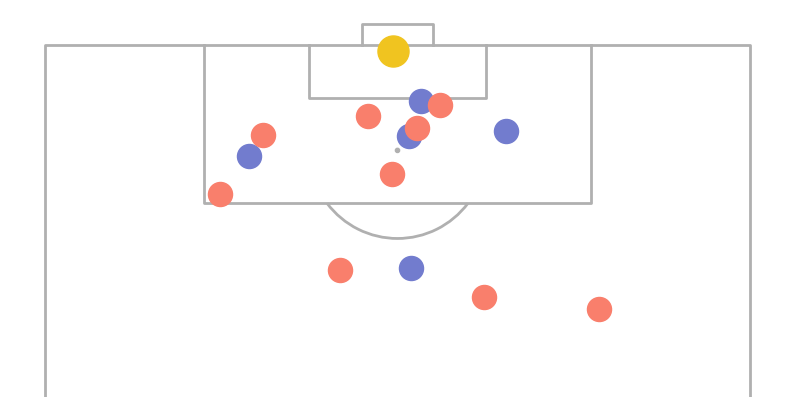

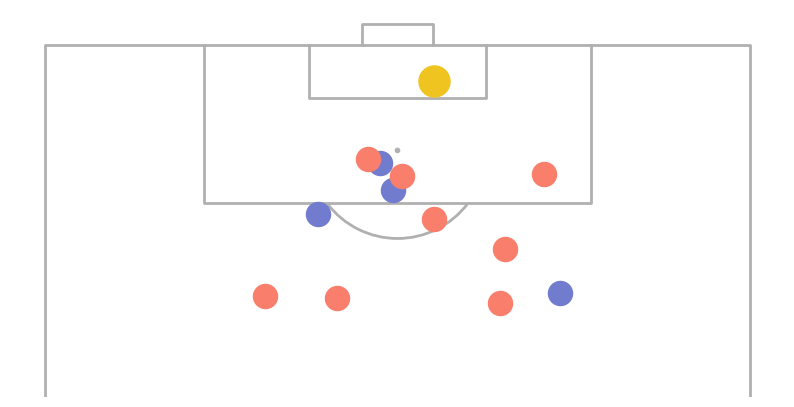

In [73]:
parser = Sbopen()
pitch = VerticalPitch(half=True, goal_type='box', pad_bottom=-20)
robotto_regular = FontManager()

# Get unique match IDs
games = spain_matches['match_id'].unique()

# Iterate over each match
for game_id in games:
    print(f"Processing match ID: {game_id}")

    # Load event, related, freeze, and tactics data
    df_event, df_related, df_freeze, df_tactics = parser.event(game_id)
    df_lineup = parser.lineup(game_id)
    df_lineup = df_lineup[['player_id', 'jersey_number', 'team_name']].copy()

    # Check if Dani Olmo is in this match
    if 'Daniel Olmo Carvajal' not in df_event['player_name'].values:
        print("Daniel Olmo Carvajal not in this match.")
        continue

    # Get Dani Olmo's player ID
    dani_olmo_id_series = df_event[df_event['player_name'] == 'Daniel Olmo Carvajal']['player_id']
    
    if dani_olmo_id_series.empty:
        print("Dani Olmo's ID not found.")
        continue

    dani_olmo_id = dani_olmo_id_series.iloc[0]

    # Filter assists by Dani Olmo
    df_assists = df_event[(df_event['player_id'] == dani_olmo_id) & 
                          (df_event['type_name'] == 'Pass') & 
                          (df_event['pass_goal_assist'] == True)]

    if df_assists.empty:
        print("No assists found for Dani Olmo.")
        continue

    print(f"Found {len(df_assists)} assists for Dani Olmo.")

    for idx, assist in df_assists.iterrows():
        assist_id = assist['id']
        recipient_id = assist['pass_recipient_id']
        pass_assisted_shot_id = assist['pass_assisted_shot_id']

        # Print assist details
        print(f"Assist ID: {assist_id}")
        print(f"Pass Recipient ID: {recipient_id}")
        print(f"Pass Assisted Shot ID: {pass_assisted_shot_id}")

        # Check if pass_assisted_shot_id exists in shot events
        df_shot_event = df_event[df_event['pass_assisted_shot_id'] == pass_assisted_shot_id]

        if df_shot_event.empty:
            print(f"No shot event found for this assist with Pass Assisted Shot ID: {pass_assisted_shot_id}.")
            continue

        # Merge freeze frame data
        df_freeze_frame = df_freeze[df_freeze['id'].astype(str) == pass_assisted_shot_id].copy()
        df_freeze_frame = df_freeze_frame.merge(df_lineup, how='left', on='player_id')

        # Define team names
        team1 = assist['team_name']
        team2 = list(set(df_event['team_name'].unique()) - {team1})[0]

        # Filter freeze frame data
        df_team1 = df_freeze_frame[df_freeze_frame['team_name'] == team1]
        df_team2_goal = df_freeze_frame[(df_freeze_frame['team_name'] == team2) & 
                                        (df_freeze_frame['position_name'] == 'Goalkeeper')]
        df_team2_other = df_freeze_frame[(df_freeze_frame['team_name'] == team2) & 
                                         (df_freeze_frame['position_name'] != 'Goalkeeper')]

        # Generate plot
        fig, ax = plt.subplots(figsize=(10, 7))
        pitch.draw(ax=ax)

        # Plot players
        if not df_team1.empty:
            pitch.scatter(df_team1.x, df_team1.y, s=300, c='#727cce', label='Attacker', ax=ax)
        if not df_team2_other.empty:
            pitch.scatter(df_team2_other.x, df_team2_other.y, s=300, c='#f97f6c', label='Defender', ax=ax)
        if not df_team2_goal.empty:
            pitch.scatter(df_team2_goal.x, df_team2_goal.y, s=500, c='#f0c420', label='Goalkeeper', ax=ax)

        # Plot assist
        assist_pos = assist[['x', 'y']].values
        recipient_pos = df_freeze_frame[df_freeze_frame['player_id'] == recipient_id][['x', 'y']].values

        if recipient_pos.size == 0:
            print(f"No position data for pass recipient ID: {recipient_id}")
            continue
        
        recipient_pos = recipient_pos[0]
        
        # Plot assist as an arrow
        ax.annotate('', xy=(recipient_pos[0], recipient_pos[1]), xytext=(assist_pos[0], assist_pos[1]),
                    arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='->', lw=2, alpha=0.8))

        # Add jersey numbers
        for _, row in df_freeze_frame.iterrows():
            player_pos = (row['x'], row['y'])
            jersey_number = row['jersey_number']
            ax.text(player_pos[0], player_pos[1], str(jersey_number), color='black', 
                    fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

        # Plot shot events
        for _, shot in df_shot_event.iterrows():
            shot_pos = (shot['x'], shot['y'])
            ax.scatter(*shot_pos, marker='o', s=300, color='red', label='Shot')

        plt.legend()
        plt.title(f"Assist and Shot Event Visualization for Match ID {game_id}")
        plt.show()